In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
categorias = {
  'Computers': ['computer_', os.listdir('imagenes/Computers')],
  'Hats': ['hat_', os.listdir('imagenes/Hats')],
  'Pants': ['pant_', os.listdir('imagenes/Pants')],
  'Phones': ['phone_', os.listdir('imagenes/Phones')],
  'Shoes': ['shoe_', os.listdir('imagenes/Shoes')],
  'Sweaters': ['sweater_', os.listdir('imagenes/Sweaters')],
  'T-shirts': ['tshirt_', os.listdir('imagenes/T-shirts')],
  'Underwears': ['underwear_', os.listdir('imagenes/Underwears')]
}

In [8]:
# for i in categorias:
#   for j in categorias[i][1]:
#     # Utiliza el nombre completo del archivo al construir la ruta original
#     ruta_original = 'imagenes/' + i + '/' + j
#     numero = categorias[i][1].index(j) + 1
#     ruta_nueva = 'imagenes/' + i + '/' + categorias[i][0] + str(numero) + '.jpg'
    
#     try:
#         os.rename(ruta_original, ruta_nueva)
#     except FileExistsError:
#       continue
#     except FileNotFoundError:
#       continue

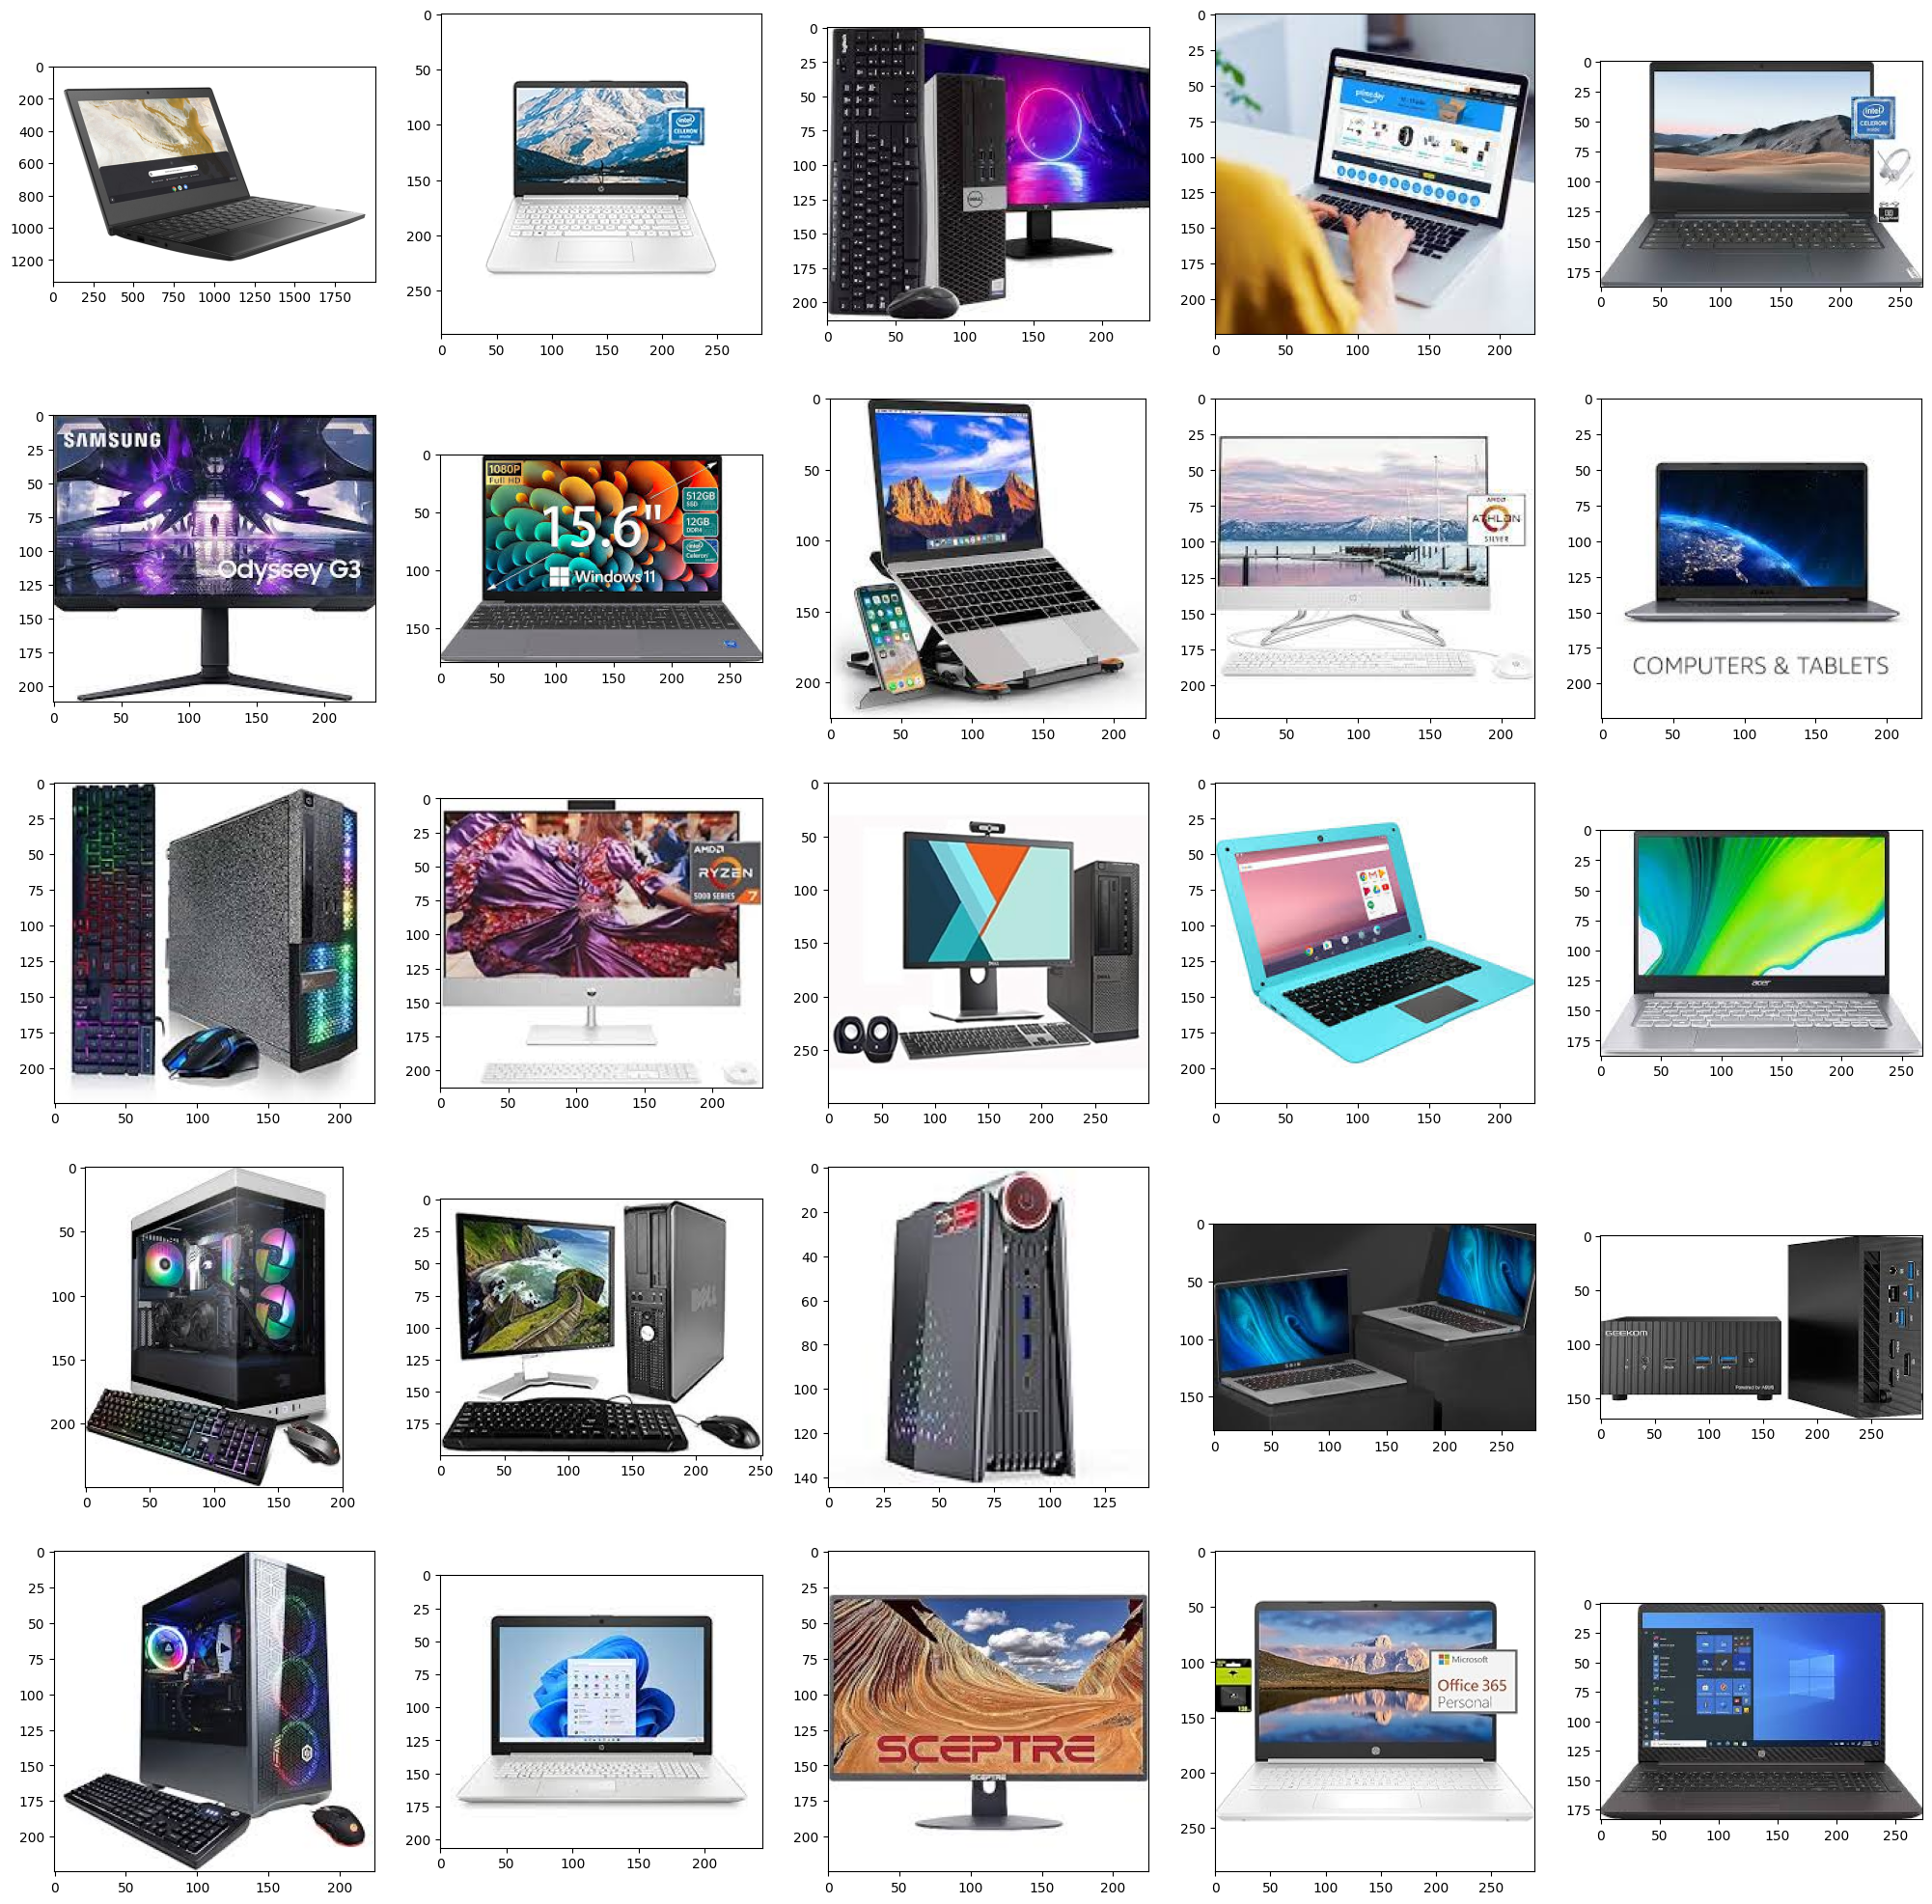

In [9]:
plt.figure(figsize=(25,25))

for i, imageName in enumerate(os.listdir('imagenes/Computers')[:25]):
  ruta = 'imagenes/Computers/' + imageName
  img = mpimg.imread(ruta)
  plt.subplot(5,5,i+1)
  plt.imshow(img)


In [10]:
# Crear carpetas para el dataset de entrenamiento
!mkdir dataset
!mkdir dataset\Computers
!mkdir dataset\Hats
!mkdir dataset\Pants
!mkdir dataset\Phones
!mkdir dataset\Shoes
!mkdir dataset\Sweaters
!mkdir dataset\T-shirts
!mkdir dataset\Underwears

In [11]:
for i in categorias:
  print(i, len(categorias[i][1]))

Computers 352
Hats 234
Pants 408
Phones 221
Shoes 292
Sweaters 212
T-shirts 334
Underwears 296


In [13]:
# Copiar las imágenes a las carpetas de entrenamiento
# Además, para que todos tengan la misma cantidad de imágenes, se copiarán 200 imágenes de cada categoría
import os
import shutil

for i in categorias:
    for j in categorias[i][1][:200]:
        carpeta_fuente = 'imagenes/' + i + '/' + j
        carpeta_destino = 'dataset/' + i + '/' + j

        # Verificar si el archivo de origen existe antes de intentar copiarlo
        if os.path.exists(carpeta_fuente):
            # Copiamos la imagen
            shutil.copyfile(carpeta_fuente, carpeta_destino)
        else:
            print(f"El archivo {carpeta_fuente} no existe. No se pudo copiar.")


In [15]:
print(
  len(os.listdir('dataset/Computers')),
  len(os.listdir('dataset/Hats')),
  len(os.listdir('dataset/Pants')),
  len(os.listdir('dataset/Phones')),
  len(os.listdir('dataset/Shoes')),
  len(os.listdir('dataset/Sweaters')),
  len(os.listdir('dataset/T-shirts')),
  len(os.listdir('dataset/Underwears'))
)

200 200 200 200 200 200 200 200


In [17]:
# Aumento de datos con ImageDataGenerator
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Crear el dataset generador
datagen = ImageDataGenerator(
  rescale= 1. /255,
  rotation_range= 40,
  width_shift_range= 0.2,
  height_shift_range= 0.2,
  shear_range= 15,
  zoom_range=[0.5, 1.5],
  validation_split=0.1 # 10% de las imágenes para validación
)

# Generadores para el dataset de entrenamiento y testeo
data_gen_train = datagen.flow_from_directory('./dataset/', target_size=(224,224), batch_size=32, shuffle=True, subset='training')
data_gen_test = datagen.flow_from_directory('./dataset/', target_size=(224,224), batch_size=32, shuffle=True, subset='validation')

Found 1440 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


KeyboardInterrupt: 

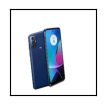

In [18]:
# Imprimir 10 imagenes del dataset de entrenamiento
for imagen, etiqueta in data_gen_test:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
    break

plt.show()

In [14]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [15]:
# Congelar las capas de la red neuronal
mobilenetv2.trainable = False

In [16]:
# Creamos el modelo
model = tf.keras.Sequential([
  mobilenetv2,
  tf.keras.layers.Dense(8, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 2268232 (8.65 MB)
Trainable params: 10248 (40.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
# Compilar el modelo
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [19]:
# Entrenar el modelo
EPOCAS = 10

history = model.fit(
  data_gen_train, 
  epochs=EPOCAS, 
  batch_size=32, 
  validation_data=data_gen_test
)

Epoch 1/10
45/45 [==============================] - 61s 1s/step - loss: 1.2920 - accuracy: 0.5611 - val_loss: 0.6209 - val_accuracy: 0.7875
Epoch 2/10
45/45 [==============================] - 43s 949ms/step - loss: 0.5583 - accuracy: 0.8347 - val_loss: 0.4990 - val_accuracy: 0.8438
Epoch 3/10
45/45 [==============================] - 60s 1s/step - loss: 0.4209 - accuracy: 0.8625 - val_loss: 0.4241 - val_accuracy: 0.8625
Epoch 4/10
45/45 [==============================] - 41s 917ms/step - loss: 0.3552 - accuracy: 0.8972 - val_loss: 0.3380 - val_accuracy: 0.9250
Epoch 5/10
45/45 [==============================] - 47s 1s/step - loss: 0.3293 - accuracy: 0.8951 - val_loss: 0.3096 - val_accuracy: 0.8938
Epoch 6/10
45/45 [==============================] - 70s 2s/step - loss: 0.3043 - accuracy: 0.9069 - val_loss: 0.3479 - val_accuracy: 0.9000
Epoch 7/10
45/45 [==============================] - 56s 1s/step - loss: 0.2704 - accuracy: 0.9146 - val_loss: 0.3393 - val_accuracy: 0.8687
Epoch 8/10
45/

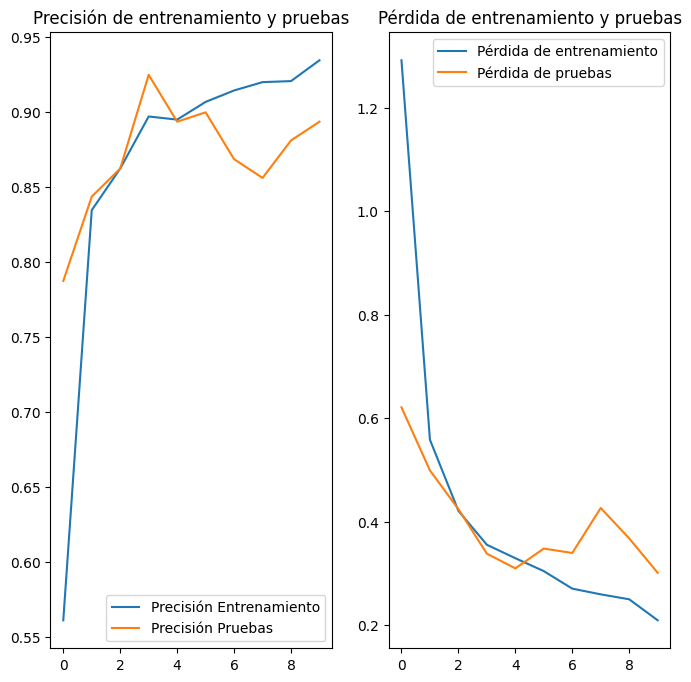

In [20]:
#Graficas de precisión
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [21]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [58]:
'''
0 = Computers
1 = Hats
2 = Pants
3 = Phones
4 = Shoes
5 = Sweaters
6 = T-shirts
7 = Underwears
'''

url = '' #debe ser 4
prediccion = categorizar (url)
print(prediccion)